In [ ]:
import keras
import tensorflow.keras.optimizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
!pip install nilearn
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 7.7 MB/s 
Mounted at /content/drive


In [ ]:
from nilearn import datasets
num = 40
adhd_data = datasets.fetch_adhd(n_subjects=num) #reads the fMRI dataset


Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/74a52d3552145e11365bb68453d1a70c/adhd40_metadata.tgz..... done.


Downloaded 16138240 of 44414948 bytes (36.3%,    1.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010042.tgz..... done.


Downloaded 32849920 of 45583539 bytes (72.1%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010064.tgz..... done.


Downloaded 29999104 of 45461055 bytes (66.0%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010128.tgz..... done.


Downloaded 26337280 of 46216320 bytes (57.0%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0021019.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023008.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023012.tgz..... done.


Downloaded 66822144 of 72402326 bytes (92.3%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027011.tgz..... done.


Downloaded 57376768 of 76184603 bytes (75.3%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027018.tgz..... done.


Downloaded 57630720 of 70074120 bytes (82.2%,    0.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027034.tgz..... done.


Downloaded 68837376 of 69291635 bytes (99.3%,    0.0s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027037.tgz..... done.


Downloaded 30646272 of 41803342 bytes (73.3%,    0.4s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1019436.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1206380.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1418396.tgz..... done.


Downloaded 34865152 of 62682233 bytes (55.6%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1517058.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1552181.tgz..... done.


Downloaded 35012608 of 60663491 bytes (57.7%,    0.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1562298.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1679142.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2014113.tgz..... done.


Downloaded 34988032 of 45455025 bytes (77.0%,    0.3s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2497695.tgz..... done.


Downloaded 34652160 of 57992968 bytes (59.8%,    0.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2950754.tgz..... done.


Downloaded 67297280 of 67925261 bytes (99.1%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3007585.tgz..... done.


Downloaded 32235520 of 32919780 bytes (97.9%,    0.0s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3154996.tgz..... done.


Downloaded 34914304 of 59835286 bytes (58.4%,    0.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3205761.tgz..... done.


Downloaded 33366016 of 61857076 bytes (53.9%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3520880.tgz..... done.


Downloaded 33980416 of 59385206 bytes (57.2%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3624598.tgz..... done.


Downloaded 33193984 of 41518251 bytes (80.0%,    0.3s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3699991.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3884955.tgz..... done.


Downloaded 35651584 of 39415752 bytes (90.5%,    0.1s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3902469.tgz..... done.


Downloaded 35577856 of 59297020 bytes (60.0%,    0.7s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3994098.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4016887.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4046678.tgz..... done.


Downloaded 69074944 of 69914913 bytes (98.8%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4134561.tgz..... done.


Downloaded 32063488 of 45506732 bytes (70.5%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4164316.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4275075.tgz..... done.


Downloaded 69189632 of 73484949 bytes (94.2%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_6115230.tgz..... done.


Downloaded 32219136 of 42188959 bytes (76.4%,    0.3s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_7774305.tgz..... done.


Downloaded 68534272 of 70396354 bytes (97.4%,    0.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8409791.tgz..... done.


Downloaded 31547392 of 45075978 bytes (70.0%,    0.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8697774.tgz..... done.


Downloaded 33955840 of 63380505 bytes (53.6%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9744150.tgz..... done.


Downloaded 22659072 of 46607053 bytes (48.6%,    1.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9750701.tgz..... done.


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
pheno = pd.read_csv('phenotypics/adhd200_preprocessed_phenotypics.tsv', sep='\t')

In [ ]:
import os
DIR = "fmri_ohsu"

ohsu = [DIR + "/" + entry for entry in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, entry))]

ohsu = ohsu[1:]

len(ohsu)

237

In [ ]:
import os
DIR = "fmri_neuroimage"

neuroimage = [DIR + "/" + entry for entry in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, entry))]
len(neuroimage)

48

In [ ]:
import os
DIR = "fmri-pittsburgh"

pittsburgh = [DIR + "/" + entry for entry in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, entry))]
len(pittsburgh)

89

In [ ]:
import os
DIR = "fmri_peking"

peking = [DIR + "/" + entry for entry in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, entry))]
len(peking)

194

In [ ]:
ohsuu = []
for i in range(len(ohsu)):
  if ohsu[i].split("_")[-1].split(".")[0] == 'run1':
    ohsuu.append(ohsu[i])

len(ohsuu)

79

In [ ]:
func = ohsuu + neuroimage + peking

len(func)

321

In [ ]:
IDs = []

for i in range(len(func)):
  IDs.append(np.int64(func[i].split("_")[3]))

In [ ]:
IDs_sort = sorted(IDs)

funcy = []
for elem in IDs_sort:
  for i in range(len(IDs_sort)):
    if np.int64(func[i].split("_")[3]) == elem:
      funcy.append(func[i])
  

In [ ]:
IsDs = []

for i in range(len(funcy)):
  IsDs.append(np.int64(funcy[i].split("_")[3]))

In [ ]:
err = []
for i in range(len(IDs)):
  if IDs[i] == 4072305:
    err.append(i)

err

[67]

Pheno tsv

In [ ]:
type(pheno["ScanDir ID"][0])

numpy.int64

In [ ]:
site_ohsu = int(pheno[pheno["ScanDir ID"] == 1084283]["Site"])

pheno_ohsu = pheno[pheno["Site"] == site_ohsu]

pheno_ohsu = pheno_ohsu.reset_index()

len(pheno_ohsu)

113

In [ ]:
int(pheno[pheno["ScanDir ID"] == 1017176]["Site"])

4

In [ ]:
site_neuroimage = int(pheno[pheno["ScanDir ID"] == 1017176]["Site"])

pheno_neuroimage = pheno[pheno["Site"] == site_neuroimage]

pheno_neuroimage = pheno_neuroimage.reset_index()

len(pheno_neuroimage)

73

In [ ]:
site_peking = int(pheno[pheno["ScanDir ID"] == 1050345]["Site"])

pheno_peking = pheno[pheno["Site"] == site_peking]

pheno_peking = pheno_peking.reset_index()

len(pheno_peking)

245

In [ ]:
int(pheno[pheno["ScanDir ID"] == 1050345]["Site"])

1

In [ ]:
diag = pd.concat([pheno_ohsu, pheno_neuroimage, pheno_peking], axis = 0)

diag = diag.reset_index()

In [ ]:
np.where(np.isnan(pheno_peking["Verbal IQ"]))

(array([], dtype=int64),)

Matching them

In [ ]:
#Last cell in matching
df_pheno = pd.DataFrame()

for elem in IDs_sort:
  for i in range(len(diag)):
    if diag.loc[i,"ScanDir ID"] == elem:
      df_pheno = df_pheno.append(diag.iloc[i,:], ignore_index = True)



In [ ]:
IDs_match = []
for i in list(df_pheno["ScanDir ID"]):
  IDs_match.append(int(i))

In [ ]:
IDs_match == IsDs

True

In [ ]:
pekingy = df_pheno[df_pheno["Site"] == 1].index

pekingy = np.array(pekingy)

pekingy_pheno = df_pheno[df_pheno["Site"] == 1]

In [ ]:
df_pheno["Verbal IQ"] = df_pheno["Verbal IQ"].apply(pd.to_numeric, errors='coerce')
df_pheno["Performance IQ"] = df_pheno["Performance IQ"].apply(pd.to_numeric, errors='coerce')
df_pheno["Full4 IQ"] = df_pheno["Full4 IQ"].apply(pd.to_numeric, errors='coerce')
df_pheno["Handedness"] = df_pheno["Handedness"].apply(pd.to_numeric, errors='coerce')

phenotypic = df_pheno[["Performance IQ"]]
phenotypic = np.array(phenotypic)

In [ ]:
y = np.array(df_pheno["DX"])

for i in range(len(y)):
  if y[i] == "1" or y[i] == "2" or y[i] == "3":
    y[i] = "1"

y = y.astype(int)

len(y)

321

In [ ]:
y_peking = y[np.ix_(list(pekingy))]

len(y_peking)

194

DictLearn

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: linewidths is ignored by contourf
  **kwargs)


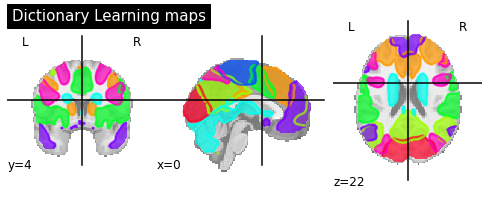

In [ ]:
from nilearn.decomposition import DictLearning

# Initialize DictLearning object
dict_learn = DictLearning(n_components=8, smoothing_fwhm=6.,
                          memory="nilearn_cache", memory_level=2,
                          random_state=0)
# Fit to the data
dict_learn.fit(adhd_data.func)
# Resting state networks/maps in attribute `components_img_`
components_img = dict_learn.components_img_

# Visualization of functional networks
from nilearn import plotting

plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='Dictionary Learning maps')

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


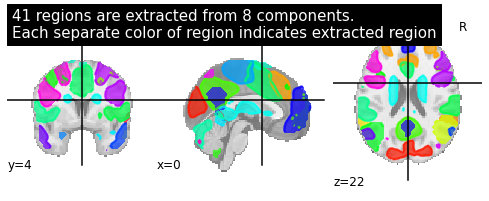

In [ ]:
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 8))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

In [ ]:
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')
for filename in funcy:
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(filename)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)

At this step I visually inspected the outputs and selected the indices below to correspond to my two networks of interest. I am fitting the DictLearn object to a small subset of the data (25%) because of the computationally extensive time.

In [ ]:
np.shape(correlations)

corrs = np.array(correlations)

corrs = corrs.reshape(len(func), n_regions_extracted, n_regions_extracted)

here = np.array([10, 13, 14, 17, 32])
here2 = np.array([37, 36, 35, 5, 8,  7, 18, 19, 20])
here_2 = np.array([10, 13, 14, 17, 32, 37, 36, 35, 5, 8,  7, 18, 19, 20])


DMN_conn = corrs[np.ix_(list(range(len(func))), here, here)]

ATT_conn = corrs[np.ix_(list(range(len(func))), here2, here2)]

ATT_DMN_conn = corrs[np.ix_(list(range(len(func))), here_2, here_2)]


out = mean_correlations[np.ix_(here, here)]

np.shape(DMN_conn)

(321, 5, 5)

ICA

In [ ]:
from nilearn import decomposition
from nilearn import plotting
from nilearn import image


canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(adhd_data.func)

CanICA(mask_strategy='background')

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: linewidths is ignored by contourf
  **kwargs)
/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


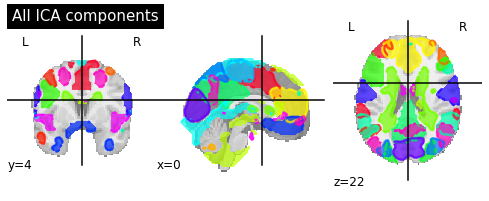

In [ ]:
components = canica.components_

#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()

In [ ]:
#Using a filter to extract the regions time series 
from nilearn import input_data
masker = input_data.NiftiMapsMasker(components_img, smoothing_fwhm=6,
 standardize=False, detrend=True,
 t_r=2.5, low_pass=0.1,
 high_pass=0.01)
#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
for func_file in funcy:
 time_series = masker.fit_transform(func_file)
 subjects.append(time_series)

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects)

In [ ]:
np.shape(correlation_matrices)

(321, 20, 20)

K-means

In [ ]:
#initializes the k-means object and fit it to the fMRI data
from nilearn.regions import Parcellations
import time

start = time.time()
kmeans = Parcellations(method='kmeans', n_parcels=20,
                       standardize=True, smoothing_fwhm=10.,
                       memory='nilearn_cache', memory_level=1,
                       verbose=1)
# Call fit on functional dataset
kmeans.fit(adhd_data.func)
print("KMeans clusters: %.2fs" % (time.time() - start))

[MultiNiftiMasker.fit] Loading data from [/root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0027018/0027018_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0027034/0027034_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/0027037/0027037_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/1019436/1019436_rest_tshift_RPI_voreg_mni.nii.gz,
 /root/nilearn_data/adhd/data/1206380/1206380_rest_tshift_RPI_voreg_mni.nii.gz,

/usr/local/lib/python3.7/dist-packages/nilearn/_utils/cache_mixin.py:307: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[Parcellations] computing kmeans
KMeans clusters: 163.46s


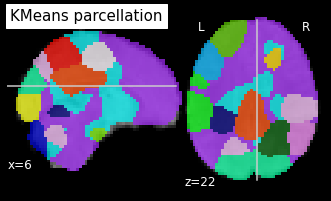

In [ ]:
#plot the k-means clusters on the brain

kmeans_labels_img = kmeans.labels_img_

from nilearn.image import mean_img, index_img

mean_func_img = mean_img(adhd_data.func[0])


display = plotting.plot_roi(kmeans_labels_img, mean_func_img,
                            title="KMeans parcellation",
                            display_mode='xz')

# kmeans_labels_img is a Nifti1Image object, it can be saved to file with
# the following code:
kmeans_labels_img.to_filename('kmeans_parcellation.nii.gz')

In [ ]:
kmeny = kmeans.transform(funcy)

In [ ]:
#Measure connectivity using correlation, creating a correlation matrix
correlation_measure_2 = ConnectivityMeasure(kind='correlation')
correlation_matrices_2 = correlation_measure_2.fit_transform(kmeny)

Preparing input data X. Eventually I will have a function that takes as arguments those input arrays to make things more organized.

In [ ]:
X = np.zeros(shape=(321,25,25))

X[:,:20,:20] = correlation_matrices

X[:,20:25, 20:25] = DMN_conn


In [ ]:
X_ = np.zeros(shape=(321,29,29))

X_[:,:20,:20] = correlation_matrices

X_[:,20:29, 20:29] = ATT_conn

In [ ]:
XX = np.zeros(shape=(321,20,20))
XX[:,:20,:20] = correlation_matrices

In [ ]:
XXX = np.zeros(shape=(321,5,5))
XXX[:,:5,:5] = DMN_conn

In [ ]:
XXX_ = np.zeros(shape=(321,9,9))
XXX_[:,:9,:9] = ATT_conn

In [ ]:
XXX__ = np.zeros(shape=(321,14,14))
XXX__[:,:14,:14] = ATT_DMN_conn

In [ ]:
XXXX = np.zeros(shape=(321,41,41))
XXXX[:,:41,:41] = corrs

In [ ]:
XXXXX = np.zeros(shape=(321,20,20))
XXXXX[:,:20,:20] = correlation_matrices_2

In [ ]:
mat = []
for i in range(321):
  this = X[i,:,:]
  matr = list(this[np.triu_indices(25, k=1)])
  mat.append(matr)

In [ ]:
mat_ = []
for i in range(321):
  this = X_[i,:,:]
  matr_ = list(this[np.triu_indices(29, k=1)])
  mat_.append(matr_)

In [ ]:
maty = np.concatenate([mat, phenotypic], axis=1)

In [ ]:
matt = []
for i in range(321):
  this = XX[i,:,:]
  mattr = list(this[np.triu_indices(20, k=1)])
  matt.append(mattr)

In [ ]:
np.shape(matt)

(321, 190)

In [ ]:
matty = np.concatenate([matt, phenotypic], axis=1)

In [ ]:
mattt = []
for i in range(321):
  this = XXX[i,:,:]
  matttr = list(this[np.triu_indices(5, k=1)])
  mattt.append(matttr)

In [ ]:
mattty = np.concatenate([mattt, phenotypic], axis=1)

np.shape(mattty)

(321, 11)

In [ ]:
mattt_ = []
for i in range(321):
  this = XXX_[i,:,:]
  mattt_r = list(this[np.triu_indices(9, k=1)])
  mattt_.append(mattt_r)

In [ ]:
mattty_ = np.concatenate([mattt_, phenotypic], axis=1)

In [ ]:
mattt__ = []
for i in range(321):
  this = XXX__[i,:,:]
  mattt__r = list(this[np.triu_indices(14, k=1)])
  mattt__.append(mattt__r)

In [ ]:
mattty__ = np.concatenate([mattt__, phenotypic], axis=1)

In [ ]:
matttt = []
for i in range(321):
  this = XXXX[i,:,:]
  mattttr = list(this[np.triu_indices(41, k=1)])
  matttt.append(mattttr)

In [ ]:
matttty = np.concatenate([matttt, phenotypic], axis=1)

In [ ]:
mattttt = []
for i in range(321):
  this = XXXXX[i,:,:]
  matttttr = list(this[np.triu_indices(20, k=1)])
  mattttt.append(matttttr)

In [ ]:
mattttty = np.concatenate([mattttt, phenotypic], axis=1)

Tests

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC()
scores = cross_val_score(clf, np.array(phenotypic)[np.ix_(pekingy, list(range(np.shape(phenotypic)[1])))], y_peking, cv=7)
scores

array([0.71428571, 0.64285714, 0.82142857, 0.71428571, 0.57142857,
       0.74074074, 0.74074074])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(model, np.array(mattty)[np.ix_(pekingy, list(range(np.shape(mattty)[1])))], y_peking, cv=7)

np.mean(scores)

0.6392668178382463

In [ ]:
from sklearn.neural_network import MLPClassifier

modell = MLPClassifier(max_iter=10000)
scores = cross_val_score(modell, np.array(phenotypic)[np.ix_(pekingy, list(range(np.shape(phenotypic)[1])))], y_peking, cv=7)
mlp_five = np.mean(scores)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
scores = cross_val_score(logreg, np.array(mattty)[np.ix_(pekingy, list(range(np.shape(mattty)[1])))], y_peking, cv=7)
np.mean(scores)

0.5765306122448981

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelll = GaussianNB()
scores = cross_val_score(modelll, np.array(mattty)[np.ix_(pekingy, list(range(np.shape(mattty)[1])))], y_peking, cv=7)
np.mean(scores)

0.6131897203325776

Plots

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))
plt.bar(["Kmeans clusters", "ICA clusters", "Dict_DMN", "Dict_AN", "Phenotypic", "Kmeans&PerformanceIO", "ICA&PerformanceIO", "DMN&PerformanceIQ", "AN&PerformanceIQ", "DMN&VerbalIQ"],
 [svm_kmeans, svm_ica, svm_dmn, svm_dan, svm_five, svm_kmeansandiq, svm_icaandiq, svm_dmnandiq, svm_danandiq, svm_dmnandverb])
plt.ylim([0.55,0.73])
plt.title("SVM cross-validation average accuracy")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(["Phenotypic", "Kmeans&PerformanceIO", "ICA&PerformanceIO", "DMN&PerformanceIQ", "AN&PerformanceIQ"], [mlp_five, mlp_kmeansandiq, mlp_icaandiq, mlp_dmnandiq, mlp_dacandiq])
plt.ylim([0.53, 0.69])
plt.title("MLP cross-validation average accuracy")

In [ ]:
[svm_danandiq, svm_dmnandiq, svm_kmeansandiq, svm_icaandiq, svm_dmn, svm_dan, svm_ica, svm_kmeans, svm_dmnandfour, svm_five, svm_kmeansandverb, svm_dmnandverb, svm_dacandverb, svm_icaandverb]

DNN

In [ ]:
acc = []

for i in range(7):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(np.array(mattty)[np.ix_(pekingy, list(range(np.shape(mattty)[1])))], y_peking, test_size=0.3)

  import keras
  import tensorflow.keras.optimizers
  from tensorflow.keras.optimizers import Adam
  from keras.models import Sequential
  from keras.layers import Dense
  #from keras.optimizers import Adam
  classifier = Sequential()
  #First Hidden Layer
  classifier.add(Dense(32, activation='tanh', kernel_initializer='random_normal', input_shape=np.shape(mattty)[1:]))
  #Second Hidden Layer
  classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
  #Third Hidden Layer
  classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
  #Output Layer
  classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
  #Compiling the model
  classifier.compile(optimizer = Adam(lr =.0001),loss='binary_crossentropy', metrics =['accuracy'])
  #Fitting the model
  classifier.fit(np.array(X_train),np.array(y_train), batch_size=32, epochs=100)
  eval_model=classifier.evaluate(np.array(X_train), np.array(y_train))
  acc.append(eval_model[1])

Text(0.5, 1.0, 'DNN cross-validation average accuracy')

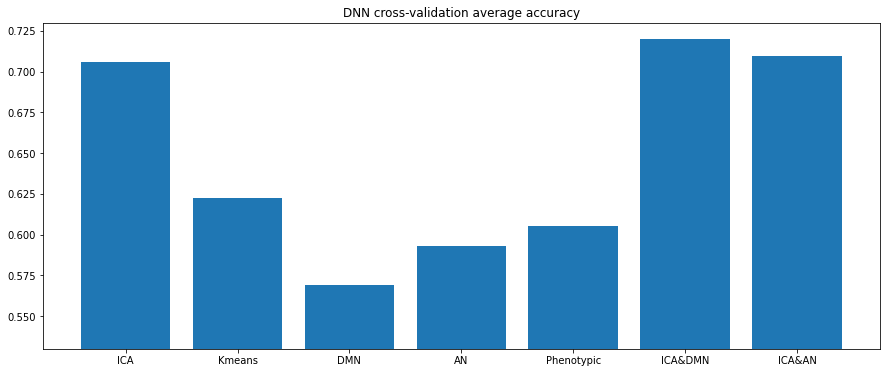

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(["ICA", "Kmeans", "DMN", "AN", "Phenotypic", "ICA&DMN", "ICA&AN"], [np.mean(acc_without), np.mean(acc_kmeans), np.mean(acc_dmn), np.mean(acc_dac), np.mean(acc_pheno), np.mean(acc_with), np.mean(acc_with_dac)])
plt.ylim([0.53, 0.73])
plt.title("DNN cross-validation average accuracy")

In [ ]:
[acc_without, acc_with, acc_with_dac]

[[0.7053571343421936,
  0.6919642686843872,
  0.7098214030265808,
  0.7008928656578064,
  0.7321428656578064,
  0.6964285969734192,
  0.7053571343421936],
 [0.7366071343421936,
  0.7321428656578064,
  0.71875,
  0.6919642686843872,
  0.7008928656578064,
  0.7142857313156128,
  0.7455357313156128],
 [0.6919642686843872,
  0.7232142686843872,
  0.71875,
  0.75,
  0.6651785969734192,
  0.7098214030265808,
  0.7098214030265808]]

In [ ]:
eval_model=classifier.evaluate(np.array(X_train), np.array(y_train))
eval_model[1]

0.7276785969734192

In [ ]:
np.save('DMN_conn', DMN_conn)
np.save('correlation_matrices', correlation_matrices)
np.save('corrs', corrs)
np.save('correlations', correlations)